In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x_train, y_train), (x_cv, y_cv) = DataUtil.gen_noisy_linear(one_hot=False)

In [2]:
from Toolbox import DT2NN

nn = DT2NN(x_train, y_train, x_cv, y_cv, activations=["sign", "one_hot"]).fit(snapshot_ratio=0)
nn = DT2NN(x_train, y_train, x_cv, y_cv, activations=["sign", "softmax"]).fit(snapshot_ratio=0)
nn = DT2NN(x_train, y_train, x_cv, y_cv, activations=["tanh", "softmax"]).fit(snapshot_ratio=0)

Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   CV :    0.818
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   CV :    0.818
------------------------------------------------------------
Epoch   32   Iter 1119   Snapshot   32 (acc)  -  Train :      1.0   CV :    0.818  -  Time Cost: 7.937252759933472
Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   CV : 0.817333
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   CV : 0.817333
------------------------------------------------------------
Epoch   32   Iter 1119   Snapshot   32 (acc)  -  Train :    0.999   CV : 0.916667  -  Time Cost: 13.38836121559143
Decision Tree performance


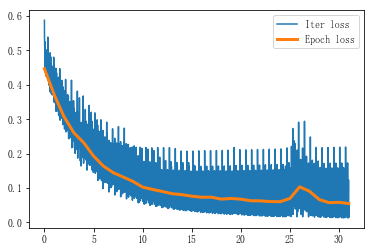

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

el, il = nn.log["epoch_loss"], nn.log["iter_loss"]
ee_base = np.arange(len(el))
ie_base = np.linspace(0, len(el) - 1, len(il))
plt.figure()
plt.plot(ie_base, il, label="Iter loss")
plt.plot(ee_base, el, linewidth=3, label="Epoch loss")
plt.legend()
plt.show()